## Group 3

## Project Title: Loan_Status_Prediction

## Project Description
Prediction Loan Status has become one of the major task for financial industry to make an informed decision on who qualifies for loan grant. 

This project is known as Loan Prediction Status.We have the data of applicants who previously applied for the loan based on the property which is a Property Loan.
The bank will decide whether to give a loan to the applicant based on some factors such as Applicant Income, Loan Amount, previous Credit History, Co-applicant Income, etc…
Our goal is to build a Machine Learning Model to predict the loan to be approved or to be rejected for an applicant.

## Problem Statement
Loan status prediction involves classifying loans based on the borrower characteristics, loan terms and credit history.

## The project plan is as follows
- First, we will download the datasets and do some initial preparation rename columns and change values inside columns to be consistent throughout the entire datadaset.
- As part of the initial data analysis, we look at feature importance to identify which features are important in our data
- We transform categorical variables into numeric variables so we can use them in the mode
- We trained models for the machine learning such as Logistic Regression Classifier, Decision Tree Classifier, Gradient Boosting Classifier, etc.
- We made prediction using Logistic Regression Classifier and GradientBoosting Classifier models and confusion matrix to display visual results.

## Dataset Description 
The dataset used for this project consist of 13 samples each representing a loan application.
- column description
  
        - Loan_ID: A unique loan ID.
        - Gender: Either male or female.
        - Married: Weather Married(yes) or Not Married(No).
        - Dependents: Number of persons depending on the client.
        - Education: Applicant Education(Graduate or Not Graduate).
        - Self_Employed: Self-employed (Yes/No).
        - ApplicantIncome: Applicant income.
        - CoapplicantIncome: Co-applicant income.
        - LoanAmount: Loan amount in thousands.
        - Loan_Amount_Term: Terms of the loan in months.
        - Credit_History: Credit history meets guidelines.
        - Property_Area: Applicants are living either Urban, Semi-Urban or Rural.
        - Loan_Status: Loan approved (Y/N).

  ## Process
  - Importing Libraries
  - Loading of Datasets
  - Understanding the Dataset
  - Data Preprocessing
  - Exploratory Data Analysis
  - Data Preprocessing2
  - Distribution of Dataset
  - Feature Engineering
  - Baseline Training
  - Model Training
  - MOdel Evaluation
  - Final Testing and Training of model
  - Saving

## Conclusion
The feature importance analysis used in this project reveals that (credit history) is the most predictor of loan status.

## Importing Libraries

In [444]:
## Import Libraries for loading and preprocessing
import pandas as pd
import numpy as np

## Import libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## library for building a validation framwork
from sklearn.model_selection import train_test_split

## library for preprocessing data (converting categorical values to numerical)
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import StandardScaler
## library for feature engineering 
from sklearn.feature_extraction import DictVectorizer

## library for ml algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


## library for ml metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report         # for Precision and Recall Analysis
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

## Loading and Data Overview

In [445]:
## Loading the dataset using the read_csv()
data = pd.read_csv('loan_data.csv')

## Creating a copy of the dataset
df = data.copy()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [446]:
## Load the first five rows of df using the head()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [447]:
## Load the last five rows of df using the tail()
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [448]:
## Transpose the dataframe
df.T

,0,1,2,3,4,5,6,7,8,9,...,371,372,373,374,375,376,377,378,379,380
Loan_ID,LP001003,LP001005,LP001006,LP001008,LP001013,LP001024,LP001027,LP001029,LP001030,LP001032,...,LP002926,LP002928,LP002936,LP002940,LP002943,LP002953,LP002974,LP002978,LP002979,LP002990
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Male,Male,Male,Male,Male,Male,Male,Female,Male,Female
Married,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,...,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No
Dependents,1,0,0,0,0,2,2,0,2,0,...,2,0,0,0,NaN,3+,0,0,3+,0
Education,Graduate,Graduate,Not Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,...,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,Yes,No,No,No,No,NaN,No,No,No,...,Yes,No,No,No,No,No,No,No,No,Yes
ApplicantIncome,4583,3000,2583,6000,2333,3200,2500,1853,1299,4950,...,2726,3000,3859,3833,2987,5703,3232,2900,4106,4583
CoapplicantIncome,1508.0,0.0,2358.0,0.0,1516.0,700.0,1840.0,2840.0,1086.0,0.0,...,0.0,3416.0,3300.0,0.0,0.0,0.0,1950.0,0.0,0.0,0.0
LoanAmount,128.0,66.0,120.0,141.0,95.0,70.0,109.0,114.0,17.0,125.0,...,106.0,56.0,142.0,110.0,88.0,128.0,108.0,71.0,40.0,133.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,120.0,360.0,...,360.0,180.0,180.0,360.0,360.0,360.0,360.0,360.0,180.0,360.0


## Understanding the DataFrame

In [449]:
## Check for the total numbers of rows and columns
r = df.shape[0]
c = df.shape[1]
print(f'Total Number of Rows: {r}\nTotal Number of Columns: {c}')

Total Number of Rows: 381
Total Number of Columns: 13


In [450]:
## Check for the brief column summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [451]:
## Check for data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [452]:
## Check for missing values
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [453]:
## Check for duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
376    False
377    False
378    False
379    False
380    False
Length: 381, dtype: bool

In [454]:
## Check for uniqueness for each column
for each_name in df.columns:
    print(each_name)
    print(df[each_name])

Loan_ID
0      LP001003
1      LP001005
2      LP001006
3      LP001008
4      LP001013
         ...   
376    LP002953
377    LP002974
378    LP002978
379    LP002979
380    LP002990
Name: Loan_ID, Length: 381, dtype: object
Gender
0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
376      Male
377      Male
378    Female
379      Male
380    Female
Name: Gender, Length: 381, dtype: object
Married
0      Yes
1      Yes
2      Yes
3       No
4      Yes
      ... 
376    Yes
377    Yes
378     No
379    Yes
380     No
Name: Married, Length: 381, dtype: object
Dependents
0       1
1       0
2       0
3       0
4       0
       ..
376    3+
377     0
378     0
379    3+
380     0
Name: Dependents, Length: 381, dtype: object
Education
0          Graduate
1          Graduate
2      Not Graduate
3          Graduate
4      Not Graduate
           ...     
376        Graduate
377        Graduate
378        Graduate
379        Graduate
380        Graduate
Name:

## Data Preprocessing
- Normalizing the column names
- Filling the missing values
- Changing the column data types

In [455]:
## convert the column names into lower case(Normalize the column names)
df.columns = df.columns.str.lower()
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [456]:
## Convert the column data types
df['loan_id'] = df['loan_id'].astype('category')
df['gender'] = df['gender'].astype('category')
df['married'] = df['married'].astype('category')
df['dependents'] = df['dependents'].astype('category')
df['education'] = df['education'].astype('category')
df['self_employed'] = df['self_employed'].astype('category')
df['property_area'] = df['property_area'].astype('category')
df['loan_status'] = df['loan_status'].astype('category')

df.dtypes

loan_id              category
gender               category
married              category
dependents           category
education            category
self_employed        category
applicantincome         int64
coapplicantincome     float64
loanamount            float64
loan_amount_term      float64
credit_history        float64
property_area        category
loan_status          category
dtype: object

In [457]:
## filling the missing values
df['gender'] = df['gender'].fillna(df['gender'].value_counts().index[0])
df['education'] = df['education'].fillna(df['education'].value_counts().index[0])
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].value_counts().index[0])

In [458]:
df['dependents'] = df['dependents'].fillna(df['dependents'].value_counts().index[0])
df['loan_amount_term'] = df['loan_amount_term'].fillna(df['loan_amount_term'].mean())
df['credit_history'] = df['credit_history'].fillna(df['credit_history'].mean())

In [459]:
df.isna().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

## Exploratory Data Analysis
- Target Variable Analysis 
- Outlier analysis 

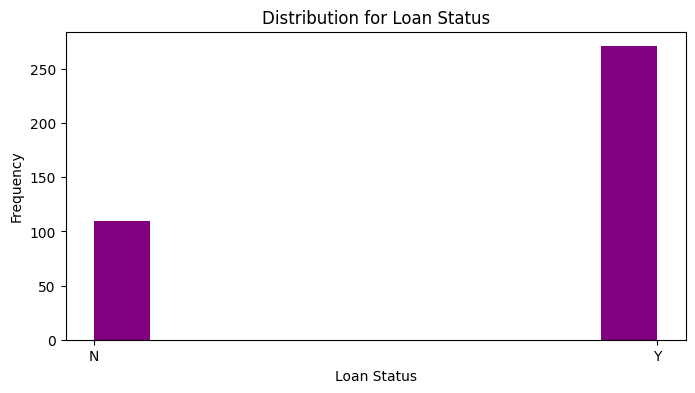

In [460]:
## Target Variable is loan_status
## Display the distribution of the target column
plt.figure(figsize = (8,4))
plt.hist(df['loan_status'], color = 'purple', bins = 10)
plt.title('Distribution for Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.show()

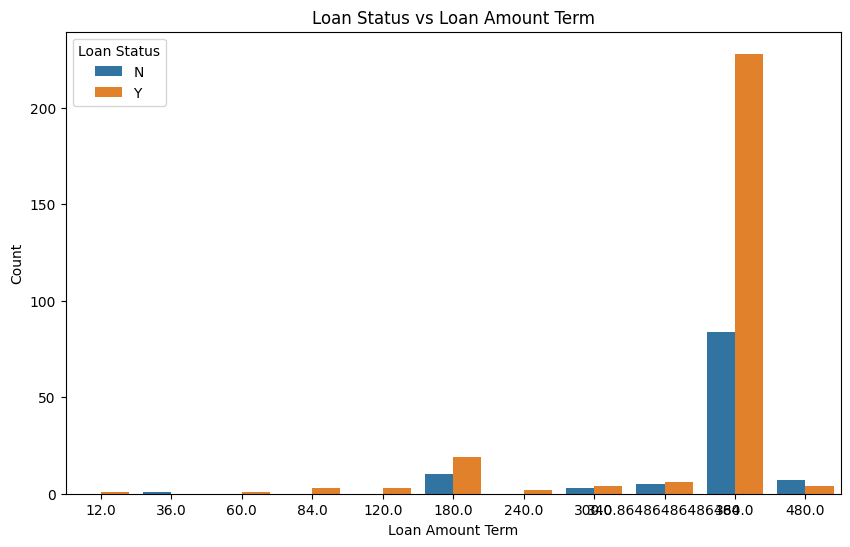

In [461]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_amount_term', hue='loan_status', data=df)
plt.title('Loan Status vs Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

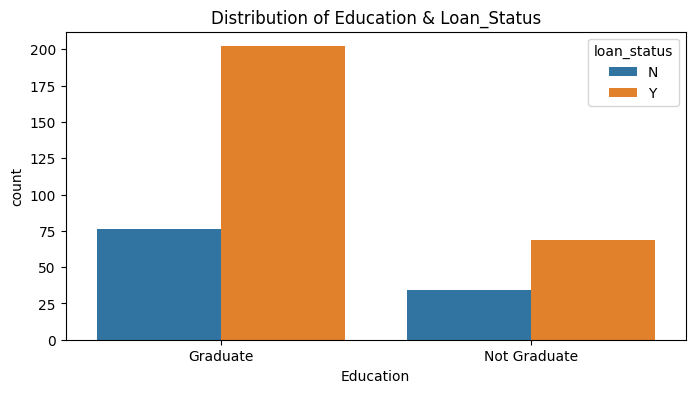

In [462]:
## Using seaborn for countplot 
## checking for education column to find out which group had a chance for getting loan
plt.figure(figsize=(8,4))
sns.countplot(x=df['education'], hue = df['loan_status'])

plt.title("Distribution of Education & Loan_Status")
plt.xlabel("Education")

plt.show()

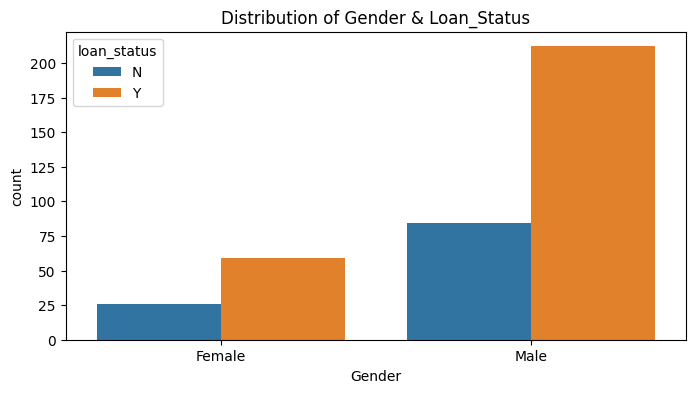

In [463]:
## Using seaborn for countplot
plt.figure(figsize=(8,4))
sns.countplot(x=df['gender'], hue = df['loan_status'])

plt.title("Distribution of Gender & Loan_Status")
plt.xlabel("Gender")

plt.show()

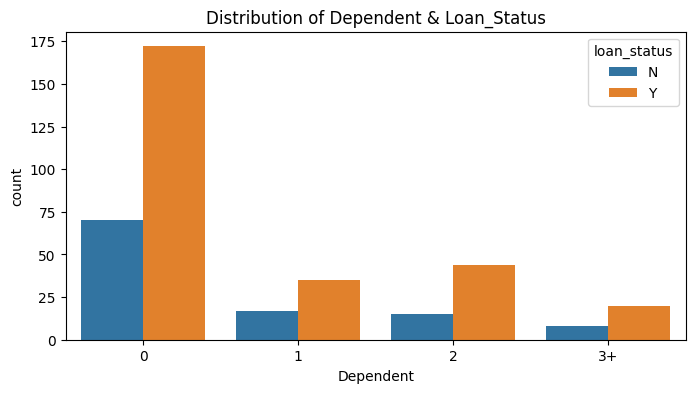

In [464]:
## Using seaborn for countplot
plt.figure(figsize=(8,4))
sns.countplot(x=df['dependents'], hue = df['loan_status'])

plt.title("Distribution of Dependent & Loan_Status")
plt.xlabel("Dependent")

plt.show()

Text(0.5, 0, 'Married')

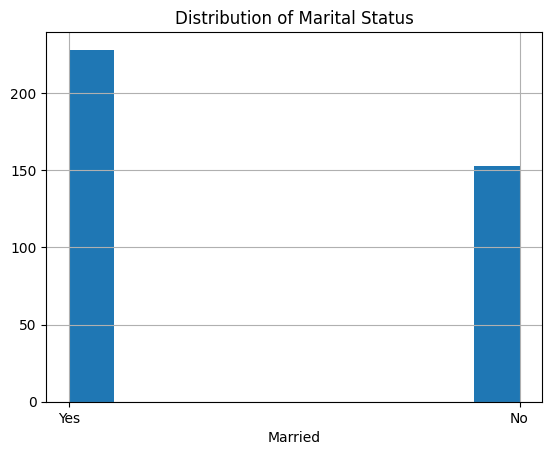

In [465]:
## histplot  for Visualizing Data Distribution for marrital status
df['married'].hist(bins=10)
plt.title("Distribution of Marital Status")
plt.xlabel("Married")

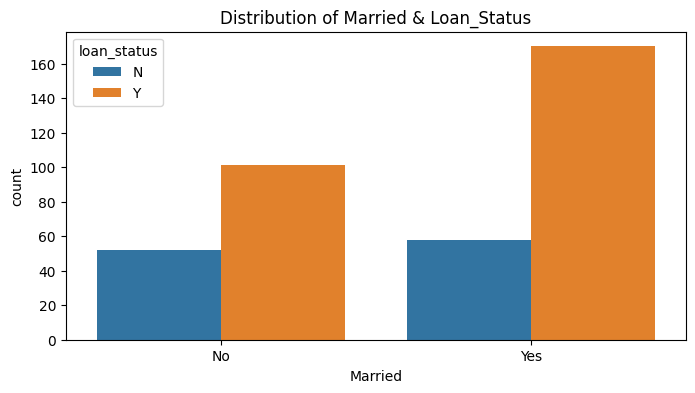

In [466]:
## Using seaborn for countplot to compare married and laon staus 
plt.figure(figsize=(8,4))
sns.countplot(x=df['married'], hue = df['loan_status'])

plt.title("Distribution of Married & Loan_Status")
plt.xlabel("Married")

plt.show()

Text(0.5, 0, 'Credit History')

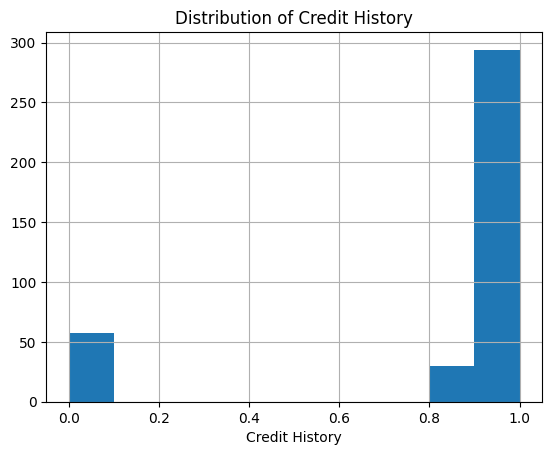

In [467]:
df['credit_history'].hist(bins = 10)
plt.title("Distribution of Credit History")
plt.xlabel("Credit History")

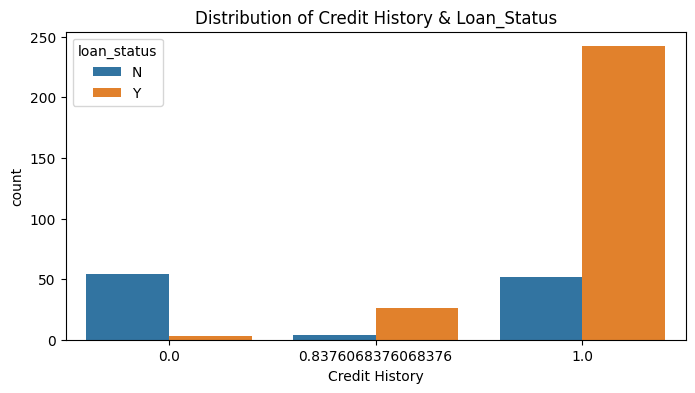

In [468]:
## Using seaborn for countplot
plt.figure(figsize=(8,4))
sns.countplot(x=df['credit_history'], hue = df['loan_status'])

plt.title("Distribution of Credit History & Loan_Status")
plt.xlabel("Credit History")

plt.show()

In [469]:
## Checking for Loan Approval chances for credit history
approved_loans = df[df['loan_status'] == 'Y']

# Calculate the counts for Credit_History
credit_history_1 = (df['credit_history'] == 1.0).sum()
credit_history_0 = (df['credit_history'] == 0.0).sum()

# Calculate the counts for approved loans with respective Credit_History
credit_1_approved = (approved_loans['credit_history'] == 1.0).sum()
credit_0_approved = (approved_loans['credit_history'] == 0.0).sum()

# Print the chances of loan approval
print(f'Loan approval chances with credit history: {credit_1_approved / credit_history_1 * 100:.2f}%')
print(f'Loan approval chances without credit history: {credit_0_approved / credit_history_0 * 100:.2f}%')

Loan approval chances with credit history: 82.31%
Loan approval chances without credit history: 5.26%


In [470]:
# analysing property area column
df['property_area'].value_counts()

property_area
Semiurban    149
Urban        126
Rural        106
Name: count, dtype: int64

In [471]:
## checking for property area with loan status
df.groupby('property_area')['loan_status'].value_counts()

property_area  loan_status
Rural          Y               65
               N               41
Semiurban      Y              119
               N               30
Urban          Y               87
               N               39
Name: count, dtype: int64

In [472]:
## Checking the Loan Approval based on property area
rural = (df['property_area']=='Rural').sum()
semiurban = (df['property_area']=='Semiurban').sum()
urban = (df['property_area']=='Urban').sum()

rural_approved = (approved_loans['property_area']=='Rural').sum()
semiurban_approved = (approved_loans['property_area']=='Semiurban').sum()
urban_approved = (approved_loans['property_area']=='Urban').sum()

print(f'Percentage of Rural approved: {rural_approved/rural*100:.2f}%')
print(f'Percentage of Semiurban approved: {semiurban_approved/semiurban*100:.2f}%')
print(f'Percentage of Uural approved: {urban_approved/urban*100:.2f}%')

Percentage of Rural approved: 61.32%
Percentage of Semiurban approved: 79.87%
Percentage of Uural approved: 69.05%


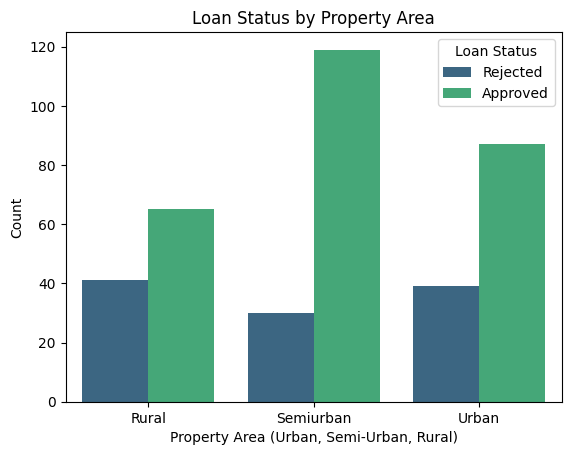

In [473]:
# Property Area vs. Loan Status
sns.countplot(x='property_area', hue='loan_status', data=df, palette='viridis')
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area (Urban, Semi-Urban, Rural)')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', labels=['Rejected', 'Approved'])
plt.show()

## Data Preprocessing 2

In [474]:
## Converting the categorical column to numerical column using the LabelEncoder()
le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [475]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0,1,1,1,0,0,251,48,79,9,2,0,0
1,1,1,1,0,0,1,116,0,26,9,2,2,1
2,2,1,1,0,1,0,75,125,71,9,2,2,1
3,3,1,0,0,0,0,298,0,92,9,2,2,1
4,4,1,1,0,1,0,56,49,46,9,2,2,1


In [476]:
del df['loan_id']

In [477]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,1,1,0,0,251,48,79,9,2,0,0
1,1,1,0,0,1,116,0,26,9,2,2,1
2,1,1,0,1,0,75,125,71,9,2,2,1
3,1,0,0,0,0,298,0,92,9,2,2,1
4,1,1,0,1,0,56,49,46,9,2,2,1


In [478]:
## Using the standard Scaler to enhance the model's performance  and prevent feature dominance
#scaler = StandardScaler()
## fit and transform the dataset
#df_scaled = scaler.fit_transform(df)

#print(df_scaled)

## Statistical Summary

In [479]:
## Describing columns labels with their integer values
df.describe().round()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
count,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0
mean,1.0,1.0,1.0,0.0,0.0,157.0,49.0,58.0,8.0,2.0,1.0,1.0
std,0.0,0.0,1.0,0.0,0.0,92.0,59.0,24.0,1.0,1.0,1.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,0.0,0.0,0.0,0.0,76.0,0.0,43.0,9.0,2.0,0.0,0.0
50%,1.0,1.0,0.0,0.0,0.0,155.0,16.0,61.0,9.0,2.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,0.0,236.0,96.0,78.0,9.0,2.0,2.0,1.0
max,1.0,1.0,3.0,1.0,1.0,321.0,181.0,100.0,10.0,2.0,2.0,1.0


In [480]:
## Ckecking the numerical columns
numerical_cols = df.select_dtypes(include = ['int','float']).round()
numerical_cols

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,1,1,0,0,251,48,79,9,2,0,0
1,1,1,0,0,1,116,0,26,9,2,2,1
2,1,1,0,1,0,75,125,71,9,2,2,1
3,1,0,0,0,0,298,0,92,9,2,2,1
4,1,1,0,1,0,56,49,46,9,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,0,0,291,0,79,9,2,2,1
377,1,1,0,0,0,144,90,59,9,2,0,1
378,0,0,0,0,0,103,0,29,9,2,0,1
379,1,1,3,0,0,224,0,7,5,2,0,1


In [481]:
## Creating correlation with numerical columns
correlation = numerical_cols.corr()
correlation

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
gender,1.000000,0.358371,0.221578,0.113260,-0.004182,0.005696,0.146402,0.052270,-0.116903,0.050662,0.003741,0.020302
married,0.358371,1.000000,0.390832,0.040532,0.001022,-0.058956,0.238162,0.141979,-0.122934,0.008593,0.034601,0.092473
dependents,0.221578,0.390832,1.000000,0.115834,0.052207,0.153810,-0.087684,0.084345,-0.091789,-0.003640,0.022785,0.013701
education,0.113260,0.040532,0.115834,1.000000,0.031469,-0.040379,-0.020392,-0.021358,-0.108636,-0.008658,-0.086582,-0.055586
self_employed,-0.004182,0.001022,0.052207,0.031469,1.000000,0.187184,-0.089056,0.024633,-0.063959,0.015270,-0.033116,-0.017947
applicantincome,0.005696,-0.058956,0.153810,-0.040379,0.187184,1.000000,-0.380985,0.300067,-0.084748,0.024326,-0.099027,-0.031740
coapplicantincome,0.146402,0.238162,-0.087684,-0.020392,-0.089056,-0.380985,1.000000,0.267546,-0.009286,0.001422,-0.050779,0.100389
loanamount,0.052270,0.141979,0.084345,-0.021358,0.024633,0.300067,0.267546,1.000000,0.116691,-0.033932,-0.167836,0.044209
loan_amount_term,-0.116903,-0.122934,-0.091789,-0.108636,-0.063959,-0.084748,-0.009286,0.116691,1.000000,0.027204,-0.124453,-0.014773
credit_history,0.050662,0.008593,-0.003640,-0.008658,0.015270,0.024326,0.001422,-0.033932,0.027204,1.000000,0.034862,0.558017


In [482]:
correlation['loan_status'].sort_values(ascending=False)

loan_status          1.000000
credit_history       0.558017
coapplicantincome    0.100389
married              0.092473
property_area        0.057834
loanamount           0.044209
gender               0.020302
dependents           0.013701
loan_amount_term    -0.014773
self_employed       -0.017947
applicantincome     -0.031740
education           -0.055586
Name: loan_status, dtype: float64

## Building a validation framework
- Let’s split the DataFrame such that
    - Assign 20% to validation 
    - Assign 20% to test.
    - Assign the remaining 60% to train.

In [483]:
## Split the dataset into training, validating and testing
df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = 10)
df_train, df_valid = train_test_split(df_train_full, test_size = 0.25, random_state = 10)

## print the output of the train, validation, and test data sample
print(f'Training Dataset: {len(df_train)}')
print(f'Validating Dataset: {len(df_valid)}')
print(f'Testing Dataset: {len(df_test)}')

Training Dataset: 228
Validating Dataset: 76
Testing Dataset: 77


In [484]:
## selecting the target column from the dataframe and convert them in matrix format or numpy array
## selecting the target column from the dataframe and convert them in matrix format or numpy array
y_train = df_train['loan_status'].values
y_valid = df_valid['loan_status'].values


In [485]:
## delete the target column from the rest of the dataframe 
del df_train['loan_status']
del df_valid['loan_status']

In [486]:
## y_train = np.log1p(y_train)
## y_valid = np.log1p(y_valid)

In [487]:
## select only numerical featues 
df_train_bl = df_train.select_dtypes(exclude=[object])
df_valid_bl = df_valid.select_dtypes(exclude=[object])
df_valid_bl

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
273,1,1,0,0,0,105,1,40,9,2,0
337,1,0,0,1,0,74,100,77,9,2,0
11,0,0,0,0,0,174,0,34,9,0,2
257,0,0,0,1,0,27,0,15,9,2,1
311,1,0,0,1,0,192,0,61,9,2,0
...,...,...,...,...,...,...,...,...,...,...,...
315,1,1,0,0,0,256,146,62,0,1,2
195,0,0,0,0,0,61,83,55,9,0,2
299,0,1,2,1,0,1,149,49,9,2,1
272,1,1,2,0,0,297,0,84,9,2,1


## Baseline Training of Logistic Regression Model

In [488]:
## convert the numerical features into numpy array
X_train_bl = df_train_bl.values
X_valid_bl = df_valid_bl.values

In [489]:
## instantiate a logistic regression algorithm 
bl_model = LogisticRegression(solver='liblinear', random_state=1)

## fit the training data to the algorithm 
bl_model.fit(X_train_bl, y_train)

LogisticRegression(random_state=1, solver='liblinear')

## Model Evaluation 

In [490]:
## generate the validation predictions 
y_valid_pred_bl = bl_model.predict(X_valid_bl)

In [491]:
## preview the validation predictions
y_valid_pred_bl

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [492]:
## lets compute the acccuracy using the accuracy_score metric 
acc_score = accuracy_score(y_valid, y_valid_pred_bl)

## display the output
print(f'Baseline Validation Accuracy Score: {round(acc_score * 100, 1)}%')
print(classification_report(y_valid, y_valid_pred_bl))

Baseline Validation Accuracy Score: 82.9%
              precision    recall  f1-score   support

           0       0.93      0.52      0.67        25
           1       0.81      0.98      0.88        51

    accuracy                           0.83        76
   macro avg       0.87      0.75      0.78        76
weighted avg       0.85      0.83      0.81        76



## Feature Engineering


In [493]:
## lets select the categorical, integer and float datatype featues 
df_train_fe = df_train.select_dtypes(include =['int','float','object'])
 
df_valid_fe = df_valid.select_dtypes(include=['int','float','object'])

In [494]:
## convert the dataframe to a dictionary format
dict_train_fe = df_train_fe.to_dict(orient = 'records')
dict_valid_fe = df_valid_fe.to_dict(orient = 'records')

In [495]:
## Create an Instance
dv = DictVectorizer(sparse = False)

dv.fit(dict_train_fe)

DictVectorizer(sparse=False)

In [496]:
## transforming the categorical data into numerical 
X_train_bl = dv.transform(dict_train_fe)
X_valid_bl = dv.transform(dict_valid_fe)

X_train_bl

array([[157., 147.,   2., ...,   1.,   2.,   0.],
       [196.,   0.,   2., ...,   1.,   1.,   0.],
       [267.,   0.,   0., ...,   1.,   1.,   0.],
       ...,
       [ 95., 117.,   2., ...,   1.,   1.,   0.],
       [ 81.,  55.,   1., ...,   0.,   2.,   0.],
       [154.,  14.,   2., ...,   1.,   1.,   0.]])

## Training a Decision Tree Model

In [497]:
## create instance 
dt_model_bl = DecisionTreeClassifier(random_state=11)

dt_model_bl.fit(X_train_bl, y_train)

DecisionTreeClassifier(random_state=11)

In [498]:
## generate validation prediction 
y_valid_pred = dt_model_bl.predict(X_valid_bl) 

dt_acc_score_bl = accuracy_score(y_valid, y_valid_pred)
print(f'Decision Tree Baseline Validation Accuracy Score: {round(dt_acc_score_bl, 2) * 100} %')
print(classification_report(y_valid, y_valid_pred))

Decision Tree Baseline Validation Accuracy Score: 78.0 %
              precision    recall  f1-score   support

           0       0.83      0.40      0.54        25
           1       0.77      0.96      0.85        51

    accuracy                           0.78        76
   macro avg       0.80      0.68      0.70        76
weighted avg       0.79      0.78      0.75        76



## Training a AdaBoost Classifier Model

In [499]:
## create instance 
abc_model_bl = AdaBoostClassifier(random_state=11)

abc_model_bl.fit(X_train_bl, y_train)

## generate validation prediction 
y_valid_pred = abc_model_bl.predict(X_valid_bl) 

abc_acc_score_bl = accuracy_score(y_valid, y_valid_pred)
print(f'AdaBoost Baseline Validation Accuracy Score: {round(abc_acc_score_bl, 2) * 100} %')
print(classification_report(y_valid, y_valid_pred))

AdaBoost Baseline Validation Accuracy Score: 80.0 %
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        25
           1       0.77      1.00      0.87        51

    accuracy                           0.80        76
   macro avg       0.89      0.70      0.72        76
weighted avg       0.85      0.80      0.77        76



## Training Bagging Classifier Model

In [500]:
## create instance 
bc_model_bl = BaggingClassifier(random_state=11)

bc_model_bl.fit(X_train_bl, y_train)

## generate validation prediction 
y_valid_pred = bc_model_bl.predict(X_valid_bl) 

bc_acc_score_bl = accuracy_score(y_valid, y_valid_pred)
print(f'Bagging Baseline Validation Accuracy Score: {round(bc_acc_score_bl, 2) * 100} %')
print(classification_report(y_valid, y_valid_pred))

Bagging Baseline Validation Accuracy Score: 83.0 %
              precision    recall  f1-score   support

           0       0.83      0.60      0.70        25
           1       0.83      0.94      0.88        51

    accuracy                           0.83        76
   macro avg       0.83      0.77      0.79        76
weighted avg       0.83      0.83      0.82        76



## Training of RandomForest Classifier Model


In [501]:
## create instance 
rfc_model_bl = RandomForestClassifier(random_state=11)

rfc_model_bl.fit(X_train_bl, y_train)

## generate validation prediction 
y_valid_pred = rfc_model_bl.predict(X_valid_bl) 

rfc_acc_score_bl = accuracy_score(y_valid, y_valid_pred)
print(f'RandomForest Baseline Validation Accuracy Score: {round(rfc_acc_score_bl, 2) * 100} %')
print(classification_report(y_valid, y_valid_pred))

RandomForest Baseline Validation Accuracy Score: 83.0 %
              precision    recall  f1-score   support

           0       1.00      0.48      0.65        25
           1       0.80      1.00      0.89        51

    accuracy                           0.83        76
   macro avg       0.90      0.74      0.77        76
weighted avg       0.86      0.83      0.81        76



## Training of GradientBooster Classifier Model


In [502]:
## create instance 
gbc_model_bl = GradientBoostingClassifier(random_state=11)

gbc_model_bl.fit(X_train_bl, y_train)

## generate validation prediction 
y_valid_pred = gbc_model_bl.predict(X_valid_bl) 

gbc_acc_score_bl = accuracy_score(y_valid, y_valid_pred)
print(f'GradientBooster Baseline Validation Accuracy Score: {round(gbc_acc_score_bl, 2) * 100} %')
print(classification_report(y_valid, y_valid_pred))

GradientBooster Baseline Validation Accuracy Score: 84.0 %
              precision    recall  f1-score   support

           0       1.00      0.52      0.68        25
           1       0.81      1.00      0.89        51

    accuracy                           0.84        76
   macro avg       0.90      0.76      0.79        76
weighted avg       0.87      0.84      0.83        76



## Training and Testing Final Model

In [503]:
# Define features (X) and target (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 304 samples
Testing set size: 77 samples


In [504]:
# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [517]:
gbc_model_bl = GradientBoostingClassifier(random_state=42, n_estimators=100)
gbc_model_bl.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [523]:
gbc_model_bl = GradientBoostingClassifier()
gbc_model_bl.fit(X_train, y_train)

gbc_pred = gbc_model_bl.predict(X_test)
gbc_proba = gbc_model_bl.predict_proba(X_test)[:, 1]

print("\nGradient Boosting Classifier:")
print(f'Accuracy: {accuracy_score(y_test, gbc_pred)}')
print("Classification Report:")
print(classification_report(y_test, gbc_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, gbc_pred))


Gradient Boosting Classifier:
Accuracy: 0.7922077922077922
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.33      0.47        21
           1       0.79      0.96      0.87        56

    accuracy                           0.79        77
   macro avg       0.79      0.65      0.67        77
weighted avg       0.79      0.79      0.76        77

Confusion Matrix:
[[ 7 14]
 [ 2 54]]


In [521]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

rfc_ypred = rfc_model.predict(X_test)
rfc_proba = rfc_model.predict_proba(X_test)[:, 0]

print("\nRandom Forest Classifier:")
print(f'Accuracy: {accuracy_score(y_test, rfc_ypred)}')
print("Classification Report:")
print(classification_report(y_test, rfc_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rfc_ypred))


Random Forest Classifier:
Accuracy: 0.8051948051948052
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.33      0.48        21
           1       0.80      0.98      0.88        56

    accuracy                           0.81        77
   macro avg       0.84      0.66      0.68        77
weighted avg       0.82      0.81      0.77        77

Confusion Matrix:
[[ 7 14]
 [ 1 55]]


In [506]:
# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [507]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict
log_reg_preds = log_reg.predict(X_test)
log_reg_proba = log_reg.predict_proba(X_test)[:, 1]

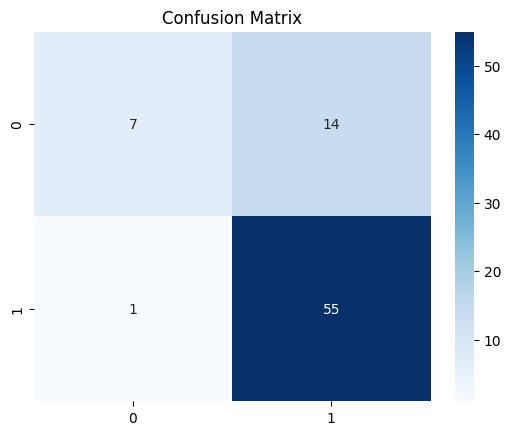

In [508]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [522]:
# Function to evaluate a model
def evaluate_model(name, y_test, y_preds, y_proba):
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_preds))
    print("Precision:", precision_score(y_test, y_preds))
    print("Recall:", recall_score(y_test, y_preds))
    print("F1-Score:", f1_score(y_test, y_preds))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))

# Evaluate the models
evaluate_model("Logistic Regression", y_test, log_reg_preds, log_reg_proba)

Model: Logistic Regression
Accuracy: 0.8051948051948052
Precision: 0.7971014492753623
Recall: 0.9821428571428571
F1-Score: 0.88
ROC-AUC: 0.6335034013605442

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.33      0.48        21
           1       0.80      0.98      0.88        56

    accuracy                           0.81        77
   macro avg       0.84      0.66      0.68        77
weighted avg       0.82      0.81      0.77        77

Confusion Matrix:
 [[ 7 14]
 [ 1 55]]


In [524]:
# Function to evaluate a model
def evaluate_model(name, y_test, y_preds, y_proba):
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_preds))
    print("Precision:", precision_score(y_test, y_preds))
    print("Recall:", recall_score(y_test, y_preds))
    print("F1-Score:", f1_score(y_test, y_preds))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))

# Evaluate the models
evaluate_model("Gradient Boosting Classifier", y_test, gbc_pred, gbc_proba)

Model: Gradient Boosting Classifier
Accuracy: 0.7922077922077922
Precision: 0.7941176470588235
Recall: 0.9642857142857143
F1-Score: 0.8709677419354839
ROC-AUC: 0.8001700680272109

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.33      0.47        21
           1       0.79      0.96      0.87        56

    accuracy                           0.79        77
   macro avg       0.79      0.65      0.67        77
weighted avg       0.79      0.79      0.76        77

Confusion Matrix:
 [[ 7 14]
 [ 2 54]]


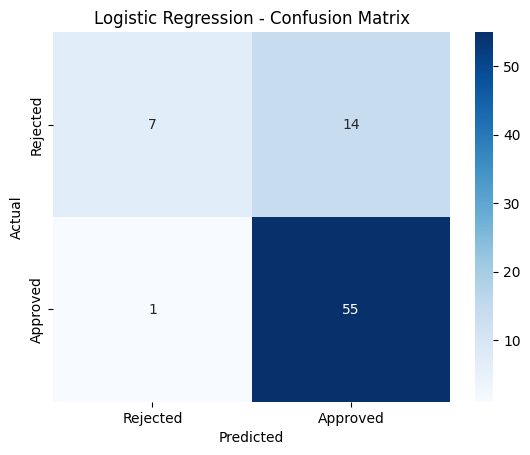

In [526]:
# Plot confusion matrix
def plot_confusion_matrix(y_test, y_preds, model_name):
    cm = confusion_matrix(y_test, y_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, log_reg_preds, "Logistic Regression")

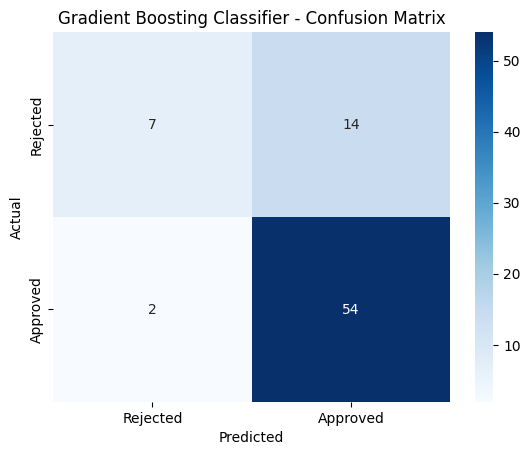

In [525]:
# Plot confusion matrix
def plot_confusion_matrix(y_test, y_preds, model_name):
    cm = confusion_matrix(y_test, y_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, gbc_pred, "Gradient Boosting Classifier")

## Feature Importance

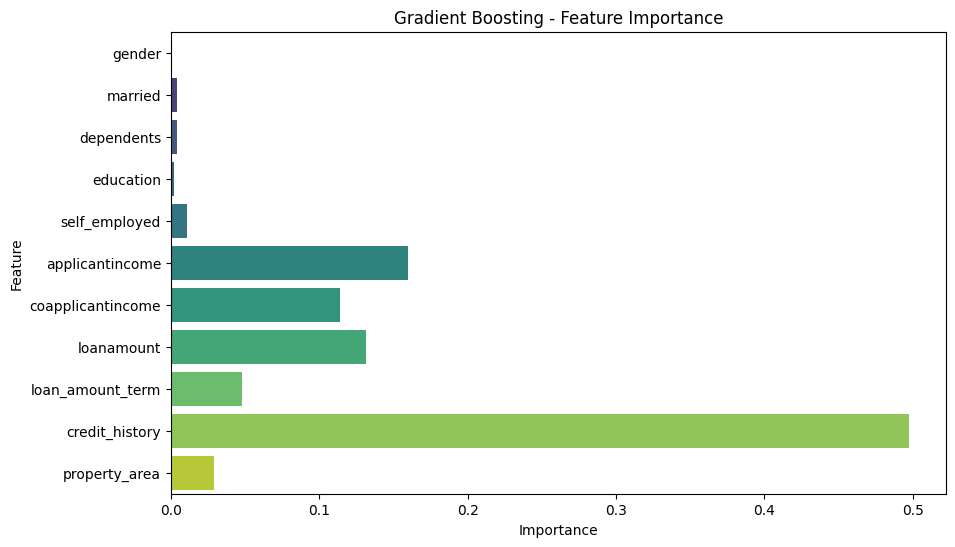

In [527]:
# Random Forest Feature Importance
importances = gbc_model_bl.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Gradient Boosting - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [528]:
# specifyging where to save the file
import pickle
with open('loan-status-predict.bin', 'wb') as f_out:
    pickle.dump(model, f_out) # <== save the model